# 10 minutes to pandas

This is a short introduction to pandas, geared mainly for new users. You can see more complex recipes in the Cookbook.

Customarily, we import as follows:

In [8]:
import numpy as np
import pandas as pd

## Object creation
See the Data Structure Intro section.

Creating a Series by passing a list of values, letting pandas create a default integer index:

In [9]:
s = pd.Series([1, 3, 5, np.nan, 6, 8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

Creating a DataFrame by passing a NumPy array, with a datetime index and labeled columns:

In [11]:
dates = pd.date_range("20130101", periods=6)

dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [12]:
df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list("ABCD"))

df

,A,B,C,D
2013-01-01,-0.130971,0.036888,1.699417,0.684841
2013-01-02,-0.475618,0.198910,-0.104487,0.790603
2013-01-03,1.095753,-0.826246,0.615007,-0.782539
2013-01-04,0.122145,-0.166471,0.315544,0.446755
2013-01-05,1.135605,-0.992824,0.394830,-0.553257
2013-01-06,0.445158,1.565569,0.387180,0.109616


Creating a DataFrame by passing a dict of objects that can be converted to series-like.

In [13]:
df2 = pd.DataFrame(
   ...:     {
   ...:         "A": 1.0,
   ...:         "B": pd.Timestamp("20130102"),
   ...:         "C": pd.Series(1, index=list(range(4)), dtype="float32"),
   ...:         "D": np.array([3] * 4, dtype="int32"),
   ...:         "E": pd.Categorical(["test", "train", "test", "train"]),
   ...:         "F": "foo",
   ...:     }
   ...: )

In [14]:
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


The columns of the resulting DataFrame have different dtypes.

In [15]:
 df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

## Viewing data

See the Basics section.

Here is how to view the top and bottom rows of the frame:

In [17]:
df.head()

,A,B,C,D
2013-01-01,-0.130971,0.036888,1.699417,0.684841
2013-01-02,-0.475618,0.198910,-0.104487,0.790603
2013-01-03,1.095753,-0.826246,0.615007,-0.782539
2013-01-04,0.122145,-0.166471,0.315544,0.446755
2013-01-05,1.135605,-0.992824,0.394830,-0.553257


In [18]:
df.tail(3)

,A,B,C,D
2013-01-04,0.122145,-0.166471,0.315544,0.446755
2013-01-05,1.135605,-0.992824,0.394830,-0.553257
2013-01-06,0.445158,1.565569,0.387180,0.109616


Display the index, columns:

In [19]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [20]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

**DataFrame.to_numpy()** gives a NumPy representation of the underlying data. Note that this can be an expensive operation when your **DataFrame** has columns with different data types, which comes down to a fundamental difference between pandas and NumPy: **NumPy arrays have one dtype for the entire array, while pandas DataFrames have one dtype per column**. When you call DataFrame.to_numpy(), pandas will find the NumPy dtype that can hold all of the dtypes in the DataFrame. This may end up being object, which requires casting every value to a Python object.

For df, our DataFrame of all floating-point values, DataFrame.to_numpy() is fast and doesn’t require copying data.

In [21]:
df.to_numpy()

array([[-0.13097068,  0.03688829,  1.69941663,  0.68484085],
       [-0.47561848,  0.19891018, -0.10448707,  0.7906032 ],
       [ 1.09575281, -0.82624606,  0.61500705, -0.78253915],
       [ 0.12214497, -0.1664708 ,  0.31554412,  0.4467546 ],
       [ 1.1356051 , -0.99282369,  0.39482993, -0.55325726],
       [ 0.44515818,  1.56556897,  0.3871802 ,  0.10961591]])

For df2, the DataFrame with multiple dtypes, DataFrame.to_numpy() is relatively expensive.

In [22]:
df2.to_numpy()

array([[1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo']],
      dtype=object)

*Note*

[`DataFrame.to_numpy()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_numpy.html#pandas.DataFrame.to_numpy) does *not* include the index or column labels in the output.

[`describe()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html#pandas.DataFrame.describe) shows a quick statistic summary of your data:

In [23]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,0.365345,-0.030696,0.551248,0.116003
std,0.655112,0.914590,0.609801,0.654735
min,-0.475618,-0.992824,-0.104487,-0.782539
25%,-0.067692,-0.661302,0.333453,-0.387539
50%,0.283652,-0.064791,0.391005,0.278185
75%,0.933104,0.158405,0.559963,0.625319
max,1.135605,1.565569,1.699417,0.790603


Transposing your data:

In [24]:
df.T

,2013-01-01,2013-01-02,2013-01-03,2013-01-04,2013-01-05,2013-01-06
A,-0.130971,-0.475618,1.095753,0.122145,1.135605,0.445158
B,0.036888,0.198910,-0.826246,-0.166471,-0.992824,1.565569
C,1.699417,-0.104487,0.615007,0.315544,0.394830,0.387180
D,0.684841,0.790603,-0.782539,0.446755,-0.553257,0.109616


Sorting by an axis:

In [27]:
df.sort_index(axis=1, ascending=False)

,D,C,B,A
2013-01-01,0.684841,1.699417,0.036888,-0.130971
2013-01-02,0.790603,-0.104487,0.198910,-0.475618
2013-01-03,-0.782539,0.615007,-0.826246,1.095753
2013-01-04,0.446755,0.315544,-0.166471,0.122145
2013-01-05,-0.553257,0.394830,-0.992824,1.135605
2013-01-06,0.109616,0.387180,1.565569,0.445158


Sorting by values:

In [31]:
df.sort_values(by="B")

,A,B,C,D
2013-01-05,1.135605,-0.992824,0.394830,-0.553257
2013-01-03,1.095753,-0.826246,0.615007,-0.782539
2013-01-04,0.122145,-0.166471,0.315544,0.446755
2013-01-01,-0.130971,0.036888,1.699417,0.684841
2013-01-02,-0.475618,0.198910,-0.104487,0.790603
2013-01-06,0.445158,1.565569,0.387180,0.109616


## Selection

Note

While standard Python / Numpy expressions for selecting and setting are intuitive and come in handy for interactive work, for production code, we recommend the optimized pandas data access methods, `.at`, `.iat`, `.loc` and `.iloc`.

See the indexing documentation [Indexing and Selecting Data](https://pandas.pydata.org/docs/user_guide/indexing.html#indexing) and [MultiIndex / Advanced Indexing](https://pandas.pydata.org/docs/user_guide/advanced.html#advanced).

### Getting

Selecting a single column, which yields a [`Series`](https://pandas.pydata.org/docs/reference/api/pandas.Series.html#pandas.Series), equivalent to `df.A`:

In [32]:
df["A"]

2013-01-01   -0.130971
2013-01-02   -0.475618
2013-01-03    1.095753
2013-01-04    0.122145
2013-01-05    1.135605
2013-01-06    0.445158
Freq: D, Name: A, dtype: float64

Selecting via [], which slices the rows.

In [33]:
df[0:3]

,A,B,C,D
2013-01-01,-0.130971,0.036888,1.699417,0.684841
2013-01-02,-0.475618,0.198910,-0.104487,0.790603
2013-01-03,1.095753,-0.826246,0.615007,-0.782539


In [34]:
df["20130102":"20130104"]

,A,B,C,D
2013-01-02,-0.475618,0.198910,-0.104487,0.790603
2013-01-03,1.095753,-0.826246,0.615007,-0.782539
2013-01-04,0.122145,-0.166471,0.315544,0.446755


### Selection by label

See more in [Selection by Label](https://pandas.pydata.org/docs/user_guide/indexing.html#indexing-label).

For getting a cross section using a label:

In [40]:
df

,A,B,C,D
2013-01-01,-0.130971,0.036888,1.699417,0.684841
2013-01-02,-0.475618,0.198910,-0.104487,0.790603
2013-01-03,1.095753,-0.826246,0.615007,-0.782539
2013-01-04,0.122145,-0.166471,0.315544,0.446755
2013-01-05,1.135605,-0.992824,0.394830,-0.553257
2013-01-06,0.445158,1.565569,0.387180,0.109616


In [42]:
df.loc[dates[0]]

A   -0.130971
B    0.036888
C    1.699417
D    0.684841
Name: 2013-01-01 00:00:00, dtype: float64

Selecting on a multi-axis by label:

In [43]:
df.loc[:, ["A", "B"]]

,A,B
2013-01-01,-0.130971,0.036888
2013-01-02,-0.475618,0.198910
2013-01-03,1.095753,-0.826246
2013-01-04,0.122145,-0.166471
2013-01-05,1.135605,-0.992824
2013-01-06,0.445158,1.565569


Showing label slicing, both endpoints are included:

In [44]:
df.loc["20130102":"20130104", ["A", "B"]]

,A,B
2013-01-02,-0.475618,0.198910
2013-01-03,1.095753,-0.826246
2013-01-04,0.122145,-0.166471


Reduction in the dimensions of the returned object:

In [45]:
df.loc["20130102", ["A", "B"]]

A   -0.475618
B    0.198910
Name: 2013-01-02 00:00:00, dtype: float64

For getting a scalar value:

In [46]:
df.loc[dates[0], "A"]

-0.13097067524678094

For getting fast access to a scalar (equivalent to the prior method):

In [47]:
df.at[dates[0], "A"]

-0.13097067524678094

### Selection by position

See more in [Selection by Position](https://pandas.pydata.org/docs/user_guide/indexing.html#indexing-integer).

Select via the position of the passed integers:

In [48]:
df.iloc[3]

A    0.122145
B   -0.166471
C    0.315544
D    0.446755
Name: 2013-01-04 00:00:00, dtype: float64

By integer slices, acting similar to numpy/Python:

In [49]:
df.iloc[3:5, 0:2]

,A,B
2013-01-04,0.122145,-0.166471
2013-01-05,1.135605,-0.992824


By lists of integer position locations, similar to the NumPy/Python style:

In [50]:
df.iloc[[1, 2, 4], [0, 2]]

,A,C
2013-01-02,-0.475618,-0.104487
2013-01-03,1.095753,0.615007
2013-01-05,1.135605,0.394830


For slicing rows explicitly:

In [51]:
df.iloc[1:3, :]

,A,B,C,D
2013-01-02,-0.475618,0.198910,-0.104487,0.790603
2013-01-03,1.095753,-0.826246,0.615007,-0.782539


For slicing columns explicitly:

In [52]:
df.iloc[:, 1:3]

,B,C
2013-01-01,0.036888,1.699417
2013-01-02,0.198910,-0.104487
2013-01-03,-0.826246,0.615007
2013-01-04,-0.166471,0.315544
2013-01-05,-0.992824,0.394830
2013-01-06,1.565569,0.387180


For getting a value explicitly:

In [53]:
 df.iloc[1, 1]

0.19891018054763382

In [54]:
df.iat[1, 1]

0.19891018054763382

### Boolean indexing

Using a single column’s values to select data.

In [55]:
df[df["A"] > 0]

,A,B,C,D
2013-01-03,1.095753,-0.826246,0.615007,-0.782539
2013-01-04,0.122145,-0.166471,0.315544,0.446755
2013-01-05,1.135605,-0.992824,0.394830,-0.553257
2013-01-06,0.445158,1.565569,0.387180,0.109616


Selecting values from a DataFrame where a boolean condition is met.

In [56]:
df[df > 0]

,A,B,C,D
2013-01-01,NaN,0.036888,1.699417,0.684841
2013-01-02,NaN,0.198910,NaN,0.790603
2013-01-03,1.095753,NaN,0.615007,NaN
2013-01-04,0.122145,NaN,0.315544,0.446755
2013-01-05,1.135605,NaN,0.394830,NaN
2013-01-06,0.445158,1.565569,0.387180,0.109616


Using the isin() method for filtering:

In [57]:
df2 = df.copy()

In [59]:
df2["E"] = ["one", "one", "two", "three", "four", "three"]

df2

,A,B,C,D,E
2013-01-01,-0.130971,0.036888,1.699417,0.684841,one
2013-01-02,-0.475618,0.198910,-0.104487,0.790603,one
2013-01-03,1.095753,-0.826246,0.615007,-0.782539,two
2013-01-04,0.122145,-0.166471,0.315544,0.446755,three
2013-01-05,1.135605,-0.992824,0.394830,-0.553257,four
2013-01-06,0.445158,1.565569,0.387180,0.109616,three


In [60]:
df2[df2["E"].isin(["two", "four"])]

,A,B,C,D,E
2013-01-03,1.095753,-0.826246,0.615007,-0.782539,two
2013-01-05,1.135605,-0.992824,0.394830,-0.553257,four


### Setting

Setting a new column automatically aligns the data by the indexes.

In [61]:
s1 = pd.Series([1, 2, 3, 4, 5, 6], index=pd.date_range("20130102", periods=6))

s1

2013-01-02    1
2013-01-03    2
2013-01-04    3
2013-01-05    4
2013-01-06    5
2013-01-07    6
Freq: D, dtype: int64

In [62]:
df["F"] = s1

Setting values by label:

In [63]:
df.at[dates[0], "A"] = 0

Setting values by position:

In [64]:
df.iat[0, 1] = 0

Setting by assigning with a NumPy array:

In [65]:
df.loc[:, "D"] = np.array([5] * len(df))

The result of the prior setting operations.

In [67]:
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,1.699417,5,NaN
2013-01-02,-0.475618,0.198910,-0.104487,5,1.0
2013-01-03,1.095753,-0.826246,0.615007,5,2.0
2013-01-04,0.122145,-0.166471,0.315544,5,3.0
2013-01-05,1.135605,-0.992824,0.394830,5,4.0
2013-01-06,0.445158,1.565569,0.387180,5,5.0


A `where` operation with setting.

In [68]:
df2 = df.copy()

In [70]:
df2[df2 > 0] = -df2

df2

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-1.699417,-5,NaN
2013-01-02,-0.475618,-0.198910,-0.104487,-5,-1.0
2013-01-03,-1.095753,-0.826246,-0.615007,-5,-2.0
2013-01-04,-0.122145,-0.166471,-0.315544,-5,-3.0
2013-01-05,-1.135605,-0.992824,-0.394830,-5,-4.0
2013-01-06,-0.445158,-1.565569,-0.387180,-5,-5.0


## Missing data

pandas primarily uses the value `np.nan` to represent missing data. It is by default not included in computations. See the [Missing Data section](https://pandas.pydata.org/docs/user_guide/missing_data.html#missing-data).

Reindexing allows you to change/add/delete the index on a specified axis. This returns a copy of the data.

In [71]:
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ["E"])

In [72]:
df1.loc[dates[0] : dates[1], "E"] = 1

In [73]:
df1

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,1.699417,5,NaN,1.0
2013-01-02,-0.475618,0.198910,-0.104487,5,1.0,1.0
2013-01-03,1.095753,-0.826246,0.615007,5,2.0,NaN
2013-01-04,0.122145,-0.166471,0.315544,5,3.0,NaN


To drop any rows that have missing data.

In [74]:
 df1.dropna(how="any")

,A,B,C,D,F,E
2013-01-02,-0.475618,0.19891,-0.104487,5,1.0,1.0


Filling missing data.

In [77]:
df1.fillna(value=5)

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,1.699417,5,5.0,1.0
2013-01-02,-0.475618,0.198910,-0.104487,5,1.0,1.0
2013-01-03,1.095753,-0.826246,0.615007,5,2.0,5.0
2013-01-04,0.122145,-0.166471,0.315544,5,3.0,5.0


To get the boolean mask where values are nan.

In [78]:
pd.isna(df1)

,A,B,C,D,F,E
2013-01-01,False,False,False,False,True,False
2013-01-02,False,False,False,False,False,False
2013-01-03,False,False,False,False,False,True
2013-01-04,False,False,False,False,False,True


## Operations

See the [Basic section on Binary Ops](https://pandas.pydata.org/docs/user_guide/basics.html#basics-binop).

### Stats

Operations in general *exclude* missing data.

Performing a descriptive statistic:

In [79]:
df.mean()

A    0.387174
B   -0.036844
C    0.551248
D    5.000000
F    3.000000
dtype: float64

Same operation on the other axis:

In [80]:
df.mean(1)

2013-01-01    1.674854
2013-01-02    1.123761
2013-01-03    1.576903
2013-01-04    1.654244
2013-01-05    1.907522
2013-01-06    2.479581
Freq: D, dtype: float64

Operating with objects that have different dimensionality and need alignment. In addition, pandas automatically broadcasts along the specified dimension.

In [81]:
s = pd.Series([1, 3, 5, np.nan, 6, 8], index=dates).shift(2)

In [82]:
s

2013-01-01    NaN
2013-01-02    NaN
2013-01-03    1.0
2013-01-04    3.0
2013-01-05    5.0
2013-01-06    NaN
Freq: D, dtype: float64

In [83]:
df.sub(s, axis="index")

,A,B,C,D,F
2013-01-01,NaN,NaN,NaN,NaN,NaN
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,0.095753,-1.826246,-0.384993,4.0,1.0
2013-01-04,-2.877855,-3.166471,-2.684456,2.0,0.0
2013-01-05,-3.864395,-5.992824,-4.605170,0.0,-1.0
2013-01-06,NaN,NaN,NaN,NaN,NaN


### Apply

Applying functions to the data:

In [84]:
df.apply(np.cumsum)

,A,B,C,D,F
2013-01-01,0.000000,0.000000,1.699417,5,NaN
2013-01-02,-0.475618,0.198910,1.594930,10,1.0
2013-01-03,0.620134,-0.627336,2.209937,15,3.0
2013-01-04,0.742279,-0.793807,2.525481,20,6.0
2013-01-05,1.877884,-1.786630,2.920311,25,10.0
2013-01-06,2.323043,-0.221061,3.307491,30,15.0


In [85]:
df.apply(lambda x: x.max() - x.min())

A    1.611224
B    2.558393
C    1.803904
D    0.000000
F    4.000000
dtype: float64

### Histogramming

See more at [Histogramming and Discretization](https://pandas.pydata.org/docs/user_guide/basics.html#basics-discretization).

In [86]:
s = pd.Series(np.random.randint(0, 7, size=10))

In [87]:
s

0    6
1    4
2    0
3    4
4    3
5    3
6    3
7    2
8    6
9    2
dtype: int32

In [88]:
s.value_counts()

3    3
6    2
4    2
2    2
0    1
dtype: int64

### String Methods

Series is equipped with a set of string processing methods in the `str` attribute that make it easy to operate on each element of the array, as in the code snippet below. Note that pattern-matching in `str` generally uses [regular expressions](https://docs.python.org/3/library/re.html) by default (and in some cases always uses them). See more at [Vectorized String Methods](https://pandas.pydata.org/docs/user_guide/text.html#text-string-methods).

In [89]:
s = pd.Series(["A", "B", "C", "Aaba", "Baca", np.nan, "CABA", "dog", "cat"])

s

0       A
1       B
2       C
3    Aaba
4    Baca
5     NaN
6    CABA
7     dog
8     cat
dtype: object

## Merge

### Concat

pandas provides various facilities for easily combining together Series and DataFrame objects with various kinds of set logic for the indexes and relational algebra functionality in the case of join / merge-type operations.

See the [Merging section](https://pandas.pydata.org/docs/user_guide/merging.html#merging).

Concatenating pandas objects together with [`concat()`](https://pandas.pydata.org/docs/reference/api/pandas.concat.html#pandas.concat):

In [90]:
df = pd.DataFrame(np.random.randn(10, 4))

df

,0,1,2,3
0,-0.557818,0.173926,-1.244407,-0.975486
1,-1.627297,0.380984,-0.887283,0.315201
2,-1.528123,0.962049,-1.290358,-0.506776
3,-1.200557,-0.667186,0.529684,0.436336
4,1.493352,-1.570800,-1.481657,0.559221
5,0.147495,0.202061,0.212983,1.491094
6,0.525013,4.319191,0.918792,-1.043347
7,-0.400014,0.566461,-0.488181,1.500122
8,1.403461,-0.585839,-0.554308,1.619602
9,0.388085,1.001180,-0.060178,1.513463


In [96]:
# break it into pieces
pieces = [df[:3], df[3:7], df[7:]]

In [97]:
pd.concat(pieces)

,0,1,2,3
0,-0.557818,0.173926,-1.244407,-0.975486
1,-1.627297,0.380984,-0.887283,0.315201
2,-1.528123,0.962049,-1.290358,-0.506776
3,-1.200557,-0.667186,0.529684,0.436336
4,1.493352,-1.570800,-1.481657,0.559221
5,0.147495,0.202061,0.212983,1.491094
6,0.525013,4.319191,0.918792,-1.043347
7,-0.400014,0.566461,-0.488181,1.500122
8,1.403461,-0.585839,-0.554308,1.619602
9,0.388085,1.001180,-0.060178,1.513463


Note

Adding a column to a [`DataFrame`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html#pandas.DataFrame) is relatively fast. However, adding a row requires a copy, and may be expensive. We recommend passing a pre-built list of records to the [`DataFrame`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html#pandas.DataFrame) constructor instead of building a [`DataFrame`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html#pandas.DataFrame) by iteratively appending records to it. See [Appending to dataframe](https://pandas.pydata.org/docs/user_guide/merging.html#merging-concatenation) for more.

### Join

SQL style merges. See the [Database style joining](https://pandas.pydata.org/docs/user_guide/merging.html#merging-join) section.

In [110]:
left = pd.DataFrame({"key": ["foo", "foo"], "lval": [1, 2]})

In [111]:
right = pd.DataFrame({"key": ["foo", "foo"], "rval": [4, 5]})

In [112]:
left

,key,lval
0,foo,1
1,foo,2


In [113]:
right

,key,rval
0,foo,4
1,foo,5


In [114]:
pd.merge(left, right, on="key")

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


Another example that can be given is:

In [115]:
left = pd.DataFrame({"key": ["foo", "bar"], "lval": [1, 2]})

In [116]:
right = pd.DataFrame({"key": ["foo", "bar"], "rval": [4, 5]})

In [117]:
left

,key,lval
0,foo,1
1,bar,2


In [118]:
right

,key,rval
0,foo,4
1,bar,5


In [119]:
pd.merge(left, right, on="key")

,key,lval,rval
0,foo,1,4
1,bar,2,5


## Grouping[¶](https://pandas.pydata.org/docs/user_guide/10min.html#grouping)

By “group by” we are referring to a process involving one or more of the following steps:

> - **Splitting** the data into groups based on some criteria
> - **Applying** a function to each group independently
> - **Combining** the results into a data structure

See the [Grouping section](https://pandas.pydata.org/docs/user_guide/groupby.html#groupby).

In [120]:
df = pd.DataFrame(
   ....:     {
   ....:         "A": ["foo", "bar", "foo", "bar", "foo", "bar", "foo", "foo"],
   ....:         "B": ["one", "one", "two", "three", "two", "two", "one", "three"],
   ....:         "C": np.random.randn(8),
   ....:         "D": np.random.randn(8),
   ....:     }
   ....: )

In [121]:
df

,A,B,C,D
0,foo,one,0.496982,0.619394
1,bar,one,-0.743559,1.345812
2,foo,two,0.462228,-0.627853
3,bar,three,-0.967814,0.498385
4,foo,two,-1.947253,-0.985586
5,bar,two,0.841853,0.816756
6,foo,one,-0.439518,-0.272575
7,foo,three,1.189229,0.399922


Grouping and then applying the sum() function to the resulting groups.

In [122]:
df.groupby("A").sum()

,C,D
A,,
bar,-0.869520,2.660953
foo,-0.238331,-0.866698


Grouping by multiple columns forms a hierarchical index, and again we can apply the sum() function.

In [123]:
df.groupby(["A", "B"]).sum()

C         D
A   B                        
bar one   -0.743559  1.345812
    three -0.967814  0.498385
    two    0.841853  0.816756
foo one    0.057464  0.346819
    three  1.189229  0.399922
    two   -1.485024 -1.613439

## Reshaping

See the sections on [Hierarchical Indexing](https://pandas.pydata.org/docs/user_guide/advanced.html#advanced-hierarchical) and [Reshaping](https://pandas.pydata.org/docs/user_guide/reshaping.html#reshaping-stacking).

### Stack

In [124]:
tuples = list(
   ....:     zip(
   ....:         *[
   ....:             ["bar", "bar", "baz", "baz", "foo", "foo", "qux", "qux"],
   ....:             ["one", "two", "one", "two", "one", "two", "one", "two"],
   ....:         ]
   ....:     )
   ....: )

In [125]:
index = pd.MultiIndex.from_tuples(tuples, names=["first", "second"])

In [126]:
df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=["A", "B"])

In [127]:
df2 = df[:4]

In [128]:
df2

A         B
first second                    
bar   one    -0.016311 -0.165178
      two     1.028212 -1.217159
baz   one     0.092364  0.425009
      two    -0.488322  1.878475

The [`stack()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.stack.html#pandas.DataFrame.stack) method “compresses” a level in the DataFrame’s columns.

In [129]:
stacked = df2.stack()

With a “stacked” DataFrame or Series (having a `MultiIndex` as the `index`), the inverse operation of [`stack()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.stack.html#pandas.DataFrame.stack) is [`unstack()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.unstack.html#pandas.DataFrame.unstack), which by default unstacks the **last level**:

In [130]:
stacked.unstack()

A         B
first second                    
bar   one    -0.016311 -0.165178
      two     1.028212 -1.217159
baz   one     0.092364  0.425009
      two    -0.488322  1.878475

In [131]:
stacked.unstack(1)

second        one       two
first                      
bar   A -0.016311  1.028212
      B -0.165178 -1.217159
baz   A  0.092364 -0.488322
      B  0.425009  1.878475

In [132]:
stacked.unstack(0)

first          bar       baz
second                      
one    A -0.016311  0.092364
       B -0.165178  0.425009
two    A  1.028212 -0.488322
       B -1.217159  1.878475

### Pivot tables

See the section on [Pivot Tables](https://pandas.pydata.org/docs/user_guide/reshaping.html#reshaping-pivot).

In [133]:
df = pd.DataFrame(
   .....:     {
   .....:         "A": ["one", "one", "two", "three"] * 3,
   .....:         "B": ["A", "B", "C"] * 4,
   .....:         "C": ["foo", "foo", "foo", "bar", "bar", "bar"] * 2,
   .....:         "D": np.random.randn(12),
   .....:         "E": np.random.randn(12),
   .....:     }
   .....: )

In [134]:
df

,A,B,C,D,E
0,one,A,foo,1.260518,0.125901
1,one,B,foo,-0.371315,0.047158
2,two,C,foo,0.631665,-0.238058
3,three,A,bar,1.727730,1.077845
4,one,B,bar,0.714589,1.429702
5,one,C,bar,-1.320036,-1.376391
6,two,A,foo,-0.477168,0.792117
7,three,B,foo,0.030052,0.588196
8,one,C,foo,-0.382956,1.690633
9,one,A,bar,-0.703939,1.201598


We can produce pivot tables from this data very easily:

In [135]:
pd.pivot_table(df, values="D", index=["A", "B"], columns=["C"])

C             bar       foo
A     B                    
one   A -0.703939  1.260518
      B  0.714589 -0.371315
      C -1.320036 -0.382956
three A  1.727730       NaN
      B       NaN  0.030052
      C -0.750209       NaN
two   A       NaN -0.477168
      B -0.568232       NaN
      C       NaN  0.631665

## Time series

pandas has simple, powerful, and efficient functionality for performing resampling operations during frequency conversion (e.g., converting secondly data into 5-minutely data). This is extremely common in, but not limited to, financial applications. See the [Time Series section](https://pandas.pydata.org/docs/user_guide/timeseries.html#timeseries).

In [136]:
rng = pd.date_range("1/1/2012", periods=100, freq="S")

In [137]:
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)

In [138]:
ts.resample("5Min").sum()

2012-01-01    26711
Freq: 5T, dtype: int32

Time zone representation:

In [139]:
rng = pd.date_range("3/6/2012 00:00", periods=5, freq="D")

In [140]:
ts = pd.Series(np.random.randn(len(rng)), rng)

In [141]:
ts

2012-03-06   -0.895199
2012-03-07    0.081099
2012-03-08    0.795949
2012-03-09   -1.083325
2012-03-10   -0.892208
Freq: D, dtype: float64

In [142]:
ts_utc = ts.tz_localize("UTC")

In [143]:
ts_utc

2012-03-06 00:00:00+00:00   -0.895199
2012-03-07 00:00:00+00:00    0.081099
2012-03-08 00:00:00+00:00    0.795949
2012-03-09 00:00:00+00:00   -1.083325
2012-03-10 00:00:00+00:00   -0.892208
Freq: D, dtype: float64

Converting to another time zone:

In [144]:
ts_utc.tz_convert("US/Eastern")

2012-03-05 19:00:00-05:00   -0.895199
2012-03-06 19:00:00-05:00    0.081099
2012-03-07 19:00:00-05:00    0.795949
2012-03-08 19:00:00-05:00   -1.083325
2012-03-09 19:00:00-05:00   -0.892208
Freq: D, dtype: float64

Converting between time span representations:

In [145]:
rng = pd.date_range("1/1/2012", periods=5, freq="M")

In [146]:
ts = pd.Series(np.random.randn(len(rng)), index=rng)

In [147]:
ts

2012-01-31    0.367429
2012-02-29    1.278583
2012-03-31   -1.028830
2012-04-30    0.042309
2012-05-31    0.650689
Freq: M, dtype: float64

In [148]:
ps = ts.to_period()

In [149]:
ps

2012-01    0.367429
2012-02    1.278583
2012-03   -1.028830
2012-04    0.042309
2012-05    0.650689
Freq: M, dtype: float64

In [150]:
ps.to_timestamp()

2012-01-01    0.367429
2012-02-01    1.278583
2012-03-01   -1.028830
2012-04-01    0.042309
2012-05-01    0.650689
Freq: MS, dtype: float64

Converting between period and timestamp enables some convenient arithmetic functions to be used. In the following example, we convert a quarterly frequency with year ending in November to 9am of the end of the month following the quarter end:

In [151]:
prng = pd.period_range("1990Q1", "2000Q4", freq="Q-NOV")

In [152]:
ts = pd.Series(np.random.randn(len(prng)), prng)

In [153]:
ts.index = (prng.asfreq("M", "e") + 1).asfreq("H", "s") + 9

In [154]:
ts.head()

1990-03-01 09:00    0.529355
1990-06-01 09:00   -0.099016
1990-09-01 09:00    0.353418
1990-12-01 09:00    0.678495
1991-03-01 09:00   -1.782991
Freq: H, dtype: float64

## Categoricals

pandas can include categorical data in a [`DataFrame`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html#pandas.DataFrame). For full docs, see the [categorical introduction](https://pandas.pydata.org/docs/user_guide/categorical.html#categorical) and the [API documentation](https://pandas.pydata.org/docs/reference/arrays.html#api-arrays-categorical).

In [155]:
df = pd.DataFrame(
   .....:     {"id": [1, 2, 3, 4, 5, 6], "raw_grade": ["a", "b", "b", "a", "a", "e"]}
   .....: )

Convert the raw grades to a categorical data type.

In [157]:
df["grade"] = df["raw_grade"].astype("category")

In [158]:
df["grade"]

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): [a, b, e]

Rename the categories to more meaningful names (assigning to Series.cat.categories() is in place!).

In [159]:
df["grade"].cat.categories = ["very good", "good", "very bad"]

Reorder the categories and simultaneously add the missing categories (methods under Series.cat() return a new Series by default).

In [160]:
df["grade"] = df["grade"].cat.set_categories(
   .....:     ["very bad", "bad", "medium", "good", "very good"]
   .....: )

In [161]:
df["grade"]

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (5, object): [very bad, bad, medium, good, very good]

Sorting is per order in the categories, not lexical order.

In [162]:
df.sort_values(by="grade")

,id,raw_grade,grade
5,6,e,very bad
1,2,b,good
2,3,b,good
0,1,a,very good
3,4,a,very good
4,5,a,very good


Grouping by a categorical column also shows empty categories.

In [163]:
df.groupby("grade").size()

grade
very bad     1
bad          0
medium       0
good         2
very good    3
dtype: int64

## Plotting

See the [Plotting](https://pandas.pydata.org/docs/user_guide/visualization.html#visualization) docs.

We use the standard convention for referencing the matplotlib API:

In [164]:
import matplotlib.pyplot as plt

plt.close("all")

In [165]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range("1/1/2000", periods=1000))

In [166]:
ts = ts.cumsum()

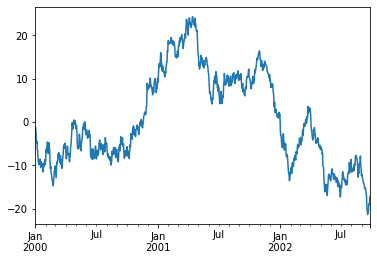

In [167]:
ts.plot()

On a DataFrame, the plot() method is a convenience to plot all of the columns with labels:

In [168]:
df = pd.DataFrame(
   .....:     np.random.randn(1000, 4), index=ts.index, columns=["A", "B", "C", "D"]
   .....: )

In [169]:
df = df.cumsum()

In [170]:
plt.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

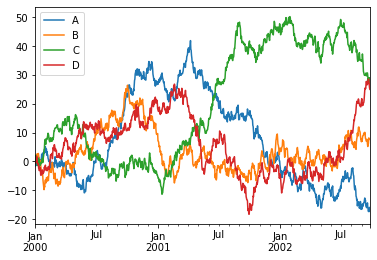

In [171]:
df.plot()

No handles with labels found to put in legend.


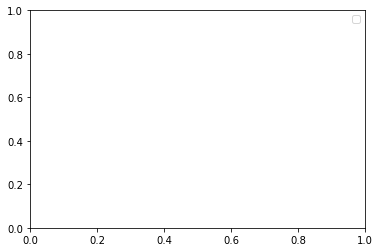

In [172]:
plt.legend(loc='best')

## Getting data in/out

### CSV

[Writing to a csv file.](https://pandas.pydata.org/docs/user_guide/io.html#io-store-in-csv)

In [173]:
df.to_csv("foo.csv")

In [174]:
pd.read_csv("foo.csv")

,Unnamed: 0,A,B,C,D
0,2000-01-01,0.176895,0.323639,-0.101278,-0.600497
1,2000-01-02,-1.553460,1.413817,2.080024,-0.268539
2,2000-01-03,-0.980564,1.246770,0.918035,-0.384526
3,2000-01-04,-1.250802,1.798186,0.745261,0.114462
4,2000-01-05,0.760368,2.250993,0.422932,1.710728
...,...,...,...,...,...
995,2002-09-22,-16.435310,8.171884,28.638943,27.944892
996,2002-09-23,-17.404037,7.917204,27.934271,27.262435
997,2002-09-24,-15.959721,7.834133,29.030615,25.779777
998,2002-09-25,-15.970977,7.918975,27.123455,25.025818


### HDF5

Reading and writing to [HDFStores](https://pandas.pydata.org/docs/user_guide/io.html#io-hdf5).

Writing to a HDF5 Store.

In [175]:
df.to_hdf("foo.h5", "df")

Reading from a HDF5 Store.

In [176]:
pd.read_hdf("foo.h5", "df")

,A,B,C,D
2000-01-01,0.176895,0.323639,-0.101278,-0.600497
2000-01-02,-1.553460,1.413817,2.080024,-0.268539
2000-01-03,-0.980564,1.246770,0.918035,-0.384526
2000-01-04,-1.250802,1.798186,0.745261,0.114462
2000-01-05,0.760368,2.250993,0.422932,1.710728
...,...,...,...,...
2002-09-22,-16.435310,8.171884,28.638943,27.944892
2002-09-23,-17.404037,7.917204,27.934271,27.262435
2002-09-24,-15.959721,7.834133,29.030615,25.779777
2002-09-25,-15.970977,7.918975,27.123455,25.025818


### Excel

Reading and writing to [MS Excel](https://pandas.pydata.org/docs/user_guide/io.html#io-excel).

Writing to an excel file.

In [177]:
df.to_excel("foo.xlsx", sheet_name="Sheet1")

Reading from an excel file.

In [179]:
pd.read_excel("foo.xlsx", "Sheet1", index_col=None, na_values=["NA"])

,Unnamed: 0,A,B,C,D
0,2000-01-01,0.176895,0.323639,-0.101278,-0.600497
1,2000-01-02,-1.553460,1.413817,2.080024,-0.268539
2,2000-01-03,-0.980564,1.246770,0.918035,-0.384526
3,2000-01-04,-1.250802,1.798186,0.745261,0.114462
4,2000-01-05,0.760368,2.250993,0.422932,1.710728
...,...,...,...,...,...
995,2002-09-22,-16.435310,8.171884,28.638943,27.944892
996,2002-09-23,-17.404037,7.917204,27.934271,27.262435
997,2002-09-24,-15.959721,7.834133,29.030615,25.779777
998,2002-09-25,-15.970977,7.918975,27.123455,25.025818


## Gotchas

If you are attempting to perform an operation you might see an exception like:

In [180]:
if pd.Series([False, True, False]):
    print("I was true")

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

See [Comparisons](https://pandas.pydata.org/docs/user_guide/basics.html#basics-compare) for an explanation and what to do.

See [Gotchas](https://pandas.pydata.org/docs/user_guide/gotchas.html#gotchas) as well.